   index                                            premise  \
0      0  씨름은 상고시대로부터 전해져 내려오는 남자들의 대표적인 놀이로서, 소년이나 장정들이...   
1      1  삼성은 자작극을 벌인 2명에게 형사 고소 등의 법적 대응을 검토 중이라고 하였으나,...   
2      2                    이를 위해 예측적 범죄예방 시스템을 구축하고 고도화한다.   
3      3  광주광역시가 재개발 정비사업 원주민들에 대한 종합대책을 마련하는 등 원주민 보호에 ...   
4      4  진정 소비자와 직원들에게 사랑 받는 기업으로 오래 지속되고 싶으면, 이런 상황에서는...   

                                hypothesis          label  
0                           씨름의 여자들의 놀이이다.  contradiction  
1                         자작극을 벌인 이는 3명이다.  contradiction  
2  예측적 범죄예방 시스템 구축하고 고도화하는 것은 목적이 있기 때문이다.     entailment  
3                        원주민들은 종합대책에 만족했다.        neutral  
4       이런 상황에서 책임 있는 모습을 보여주는 기업은 아주 드물다.        neutral  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  

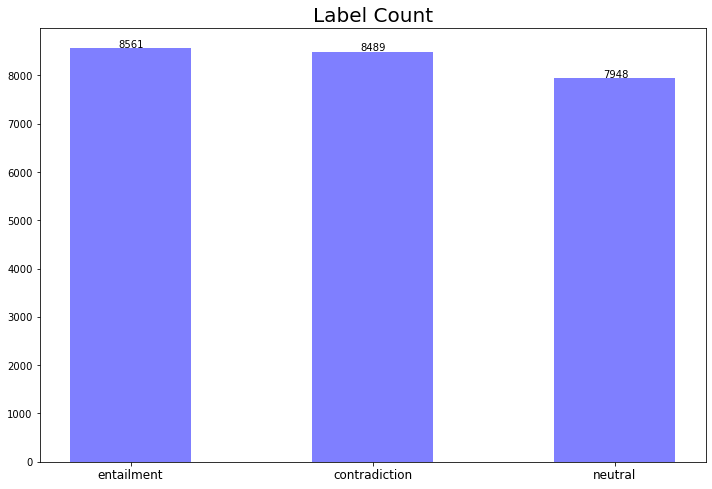

Max Premise Length:  90
Min Premise Length:  19
Mean Premise Lenght:  45.406552524201935 

Max Hypothesis Length:  103
Min Hypothesis Length:  5
Mean Hypothesis Lenght:  24.924433954716378


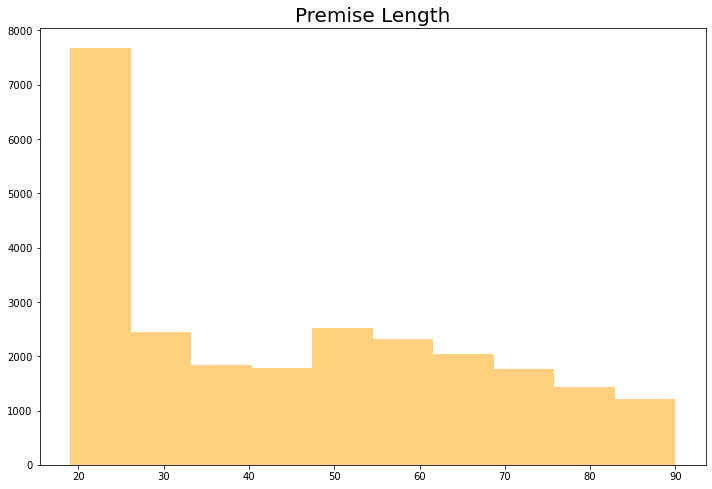

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13504/1563639221.py:63: FutureWarning: The default value of regex will change from True to False in a future version.
  train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13504/1563639221.py:64: FutureWarning: The default value of regex will change from True to False in a future version.
  test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13504/1563639221.py:67: FutureWarning: The default value of regex will change from True to False in a future version.
  train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_13504/1563639221.py:68: FutureWarning: The default value of regex will change from True to False in a future version.
  test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")


cuda:0


Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'cl

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32000, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH =  "D:/_data/dacon/open/"

train = pd.read_csv(os.path.join(PATH, 'train_data.csv'), encoding='utf-8')
test = pd.read_csv(os.path.join(PATH, 'test_data.csv'), encoding='utf-8')

print(train.head())
print(train.info(), end='\n\n')
print(test.info())
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)
print('Train Label: ', train['label'].value_counts(), sep='\n', end='\n\n')
print('Test Label: ', test['label'].value_counts(), sep='\n')
print('Train Null: ', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test.isnull().sum(), sep='\n')

feature = train['label']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

max_len = np.max(train['premise'].str.len())
min_len = np.min(train['premise'].str.len())
mean_len = np.mean(train['premise'].str.len())

print('Max Premise Length: ', max_len)
print('Min Premise Length: ', min_len)
print('Mean Premise Lenght: ', mean_len, '\n')

max_len = np.max(train['hypothesis'].str.len())
min_len = np.min(train['hypothesis'].str.len())
mean_len = np.mean(train['hypothesis'].str.len())

print('Max Hypothesis Length: ', max_len)
print('Min Hypothesis Length: ', min_len)
print('Mean Hypothesis Lenght: ', mean_len)

from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('Premise Length', fontsize=20)

plt.hist(train['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

train['premise'] = train['premise'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['premise'] = test['premise'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

train['hypothesis'] = train['hypothesis'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]', '')
test['hypothesis'] = test['hypothesis'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 0-9]", "")
train.head(5)

import os
import random
from tqdm import tqdm

import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoConfig, AutoTokenizer

def seed_everything(seed:int = 1004):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore

seed_everything(42)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

MODEL_NAME = 'klue/roberta-large'

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

config = AutoConfig.from_pretrained(MODEL_NAME)
config.num_labels = 3

model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

print(model)
print(config)

train_dataset, eval_dataset = train_test_split(train, test_size=0.2, shuffle=True, stratify=train['label'])

tokenized_train = tokenizer(
    list(train_dataset['premise']),
    list(train_dataset['hypothesis']),
    return_tensors="pt",
    max_length=256, # Max_Length = 190
    padding=True,
    truncation=True,
    add_special_tokens=True
)

tokenized_eval = tokenizer(
    list(eval_dataset['premise']),
    list(eval_dataset['hypothesis']),
    return_tensors="pt",
    max_length=256,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

print(tokenized_train['input_ids'][0])
print(tokenizer.decode(tokenized_train['input_ids'][0]))

class BERTDataset(torch.utils.data.Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        
        return item

    def __len__(self):
        return len(self.label)
    
def label_to_num(label):
    label_dict = {"entailment": 0, "contradiction": 1, "neutral": 2, "answer": 3}
    num_label = []

    for v in label:
        num_label.append(label_dict[v])
    
    return num_label


train_label = label_to_num(train_dataset['label'].values)
eval_label = label_to_num(eval_dataset['label'].values)

train_dataset = BERTDataset(tokenized_train, train_label)
eval_dataset = BERTDataset(tokenized_eval, eval_label)

print(train_dataset.__len__())
print(train_dataset.__getitem__(19997))
print(tokenizer.decode(train_dataset.__getitem__(19997)['input_ids']))

def compute_metrics(pred):
    """ validation을 위한 metrics function """
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    probs = pred.predictions

  # calculate accuracy using sklearn's function
    acc = accuracy_score(labels, preds) # 리더보드 평가에는 포함되지 않습니다.

    return {
      'accuracy': acc,
  }
    

In [2]:
training_ars = TrainingArguments(
    output_dir='./result',
    num_train_epochs=14,
    per_device_train_batch_size=6,
    save_total_limit=5,
    save_steps=500,
    evaluation_strategy='steps',
    eval_steps = 500,
    load_best_model_at_end = True,
)

trainer = Trainer(
    model=model,
    args=training_ars,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)



In [3]:
trainer.train()
model.save_pretrained('./result/checkpoint-4000')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Tokenizer_NAME = "klue/roberta-large"
tokenizer = AutoTokenizer.from_pretrained(Tokenizer_NAME)

C:\ProgramData\Anaconda3\envs\torch-gpu\lib\site-packages\transformers\optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 19998
  Num Epochs = 14
  Instantaneous batch size per device = 6
  Total train batch size (w. parallel, distributed & accumulation) = 6
  Gradient Accumulation steps = 1
  Total optimization steps = 46662
  1%|          | 500/46662 [02:16<3:22:07,  3.81it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1449, 'learning_rate': 4.946423213749947e-05, 'epoch': 0.15}


                                                     
  1%|          | 500/46662 [03:05<3:22:07,  3.81it/s]Saving model checkpoint to ./result\checkpoint-500
Configuration saved in ./result\checkpoint-500\config.json


{'eval_loss': 1.1187105178833008, 'eval_accuracy': 0.3396, 'eval_runtime': 48.8519, 'eval_samples_per_second': 102.35, 'eval_steps_per_second': 12.794, 'epoch': 0.15}


Model weights saved in ./result\checkpoint-500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-19500] due to args.save_total_limit
  2%|▏         | 1000/46662 [05:47<3:26:21,  3.69it/s] ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.127, 'learning_rate': 4.892846427499893e-05, 'epoch': 0.3}


                                                      
  2%|▏         | 1000/46662 [06:45<3:26:21,  3.69it/s]Saving model checkpoint to ./result\checkpoint-1000
Configuration saved in ./result\checkpoint-1000\config.json


{'eval_loss': 1.1318696737289429, 'eval_accuracy': 0.318, 'eval_runtime': 57.9597, 'eval_samples_per_second': 86.267, 'eval_steps_per_second': 10.783, 'epoch': 0.3}


Model weights saved in ./result\checkpoint-1000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-1000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-1000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-26500] due to args.save_total_limit
  3%|▎         | 1500/46662 [09:22<3:21:50,  3.73it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1217, 'learning_rate': 4.8392696412498395e-05, 'epoch': 0.45}


                                                      
  3%|▎         | 1500/46662 [10:12<3:21:50,  3.73it/s]Saving model checkpoint to ./result\checkpoint-1500
Configuration saved in ./result\checkpoint-1500\config.json


{'eval_loss': 1.1042780876159668, 'eval_accuracy': 0.318, 'eval_runtime': 49.8669, 'eval_samples_per_second': 100.267, 'eval_steps_per_second': 12.533, 'epoch': 0.45}


Model weights saved in ./result\checkpoint-1500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-1500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-1500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-27000] due to args.save_total_limit
  4%|▍         | 2000/46662 [12:49<3:20:01,  3.72it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1196, 'learning_rate': 4.785692854999786e-05, 'epoch': 0.6}


                                                      
  4%|▍         | 2000/46662 [13:39<3:20:01,  3.72it/s]Saving model checkpoint to ./result\checkpoint-2000
Configuration saved in ./result\checkpoint-2000\config.json


{'eval_loss': 1.1183518171310425, 'eval_accuracy': 0.3424, 'eval_runtime': 49.9799, 'eval_samples_per_second': 100.04, 'eval_steps_per_second': 12.505, 'epoch': 0.6}


Model weights saved in ./result\checkpoint-2000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-2000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-2000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-27500] due to args.save_total_limit
  5%|▌         | 2500/46662 [16:15<3:18:09,  3.71it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1173, 'learning_rate': 4.732116068749732e-05, 'epoch': 0.75}


                                                      
  5%|▌         | 2500/46662 [17:05<3:18:09,  3.71it/s]Saving model checkpoint to ./result\checkpoint-2500
Configuration saved in ./result\checkpoint-2500\config.json


{'eval_loss': 1.102891445159912, 'eval_accuracy': 0.3424, 'eval_runtime': 50.0356, 'eval_samples_per_second': 99.929, 'eval_steps_per_second': 12.491, 'epoch': 0.75}


Model weights saved in ./result\checkpoint-2500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-2500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-2500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-28000] due to args.save_total_limit
  6%|▋         | 3000/46662 [19:38<3:15:13,  3.73it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1137, 'learning_rate': 4.678539282499679e-05, 'epoch': 0.9}


                                                      
  6%|▋         | 3000/46662 [20:28<3:15:13,  3.73it/s]Saving model checkpoint to ./result\checkpoint-3000
Configuration saved in ./result\checkpoint-3000\config.json


{'eval_loss': 1.104387879371643, 'eval_accuracy': 0.3424, 'eval_runtime': 50.0549, 'eval_samples_per_second': 99.89, 'eval_steps_per_second': 12.486, 'epoch': 0.9}


Model weights saved in ./result\checkpoint-3000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-3000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-3000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-500] due to args.save_total_limit
  8%|▊         | 3500/46662 [23:03<3:13:52,  3.71it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1161, 'learning_rate': 4.6249624962496254e-05, 'epoch': 1.05}


                                                      
  8%|▊         | 3500/46662 [23:53<3:13:52,  3.71it/s]Saving model checkpoint to ./result\checkpoint-3500
Configuration saved in ./result\checkpoint-3500\config.json


{'eval_loss': 1.1013422012329102, 'eval_accuracy': 0.3396, 'eval_runtime': 50.1223, 'eval_samples_per_second': 99.756, 'eval_steps_per_second': 12.469, 'epoch': 1.05}


Model weights saved in ./result\checkpoint-3500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-3500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-3500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1000] due to args.save_total_limit
  9%|▊         | 4000/46662 [26:29<3:11:56,  3.70it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1154, 'learning_rate': 4.5713857099995714e-05, 'epoch': 1.2}


                                                      
  9%|▊         | 4000/46662 [27:19<3:11:56,  3.70it/s]Saving model checkpoint to ./result\checkpoint-4000
Configuration saved in ./result\checkpoint-4000\config.json


{'eval_loss': 1.1090044975280762, 'eval_accuracy': 0.3396, 'eval_runtime': 50.1462, 'eval_samples_per_second': 99.708, 'eval_steps_per_second': 12.464, 'epoch': 1.2}


Model weights saved in ./result\checkpoint-4000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-4000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-4000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-1500] due to args.save_total_limit
 10%|▉         | 4500/46662 [29:49<3:08:49,  3.72it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1134, 'learning_rate': 4.517808923749518e-05, 'epoch': 1.35}


                                                      
 10%|▉         | 4500/46662 [30:42<3:08:49,  3.72it/s]Saving model checkpoint to ./result\checkpoint-4500
Configuration saved in ./result\checkpoint-4500\config.json


{'eval_loss': 1.1002243757247925, 'eval_accuracy': 0.3424, 'eval_runtime': 52.8094, 'eval_samples_per_second': 94.68, 'eval_steps_per_second': 11.835, 'epoch': 1.35}


Model weights saved in ./result\checkpoint-4500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-4500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-4500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-2000] due to args.save_total_limit
 11%|█         | 5000/46662 [33:21<3:04:15,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1114, 'learning_rate': 4.464232137499465e-05, 'epoch': 1.5}


                                                      
 11%|█         | 5000/46662 [34:10<3:04:15,  3.77it/s]Saving model checkpoint to ./result\checkpoint-5000
Configuration saved in ./result\checkpoint-5000\config.json


{'eval_loss': 1.1123249530792236, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5105, 'eval_samples_per_second': 100.989, 'eval_steps_per_second': 12.624, 'epoch': 1.5}


Model weights saved in ./result\checkpoint-5000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-5000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-5000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-2500] due to args.save_total_limit
 12%|█▏        | 5500/46662 [36:46<3:02:03,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1061, 'learning_rate': 4.410655351249411e-05, 'epoch': 1.65}


                                                      
 12%|█▏        | 5500/46662 [37:36<3:02:03,  3.77it/s]Saving model checkpoint to ./result\checkpoint-5500
Configuration saved in ./result\checkpoint-5500\config.json


{'eval_loss': 1.1098495721817017, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5252, 'eval_samples_per_second': 100.959, 'eval_steps_per_second': 12.62, 'epoch': 1.65}


Model weights saved in ./result\checkpoint-5500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-5500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-5500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-3000] due to args.save_total_limit
 13%|█▎        | 6000/46662 [40:17<3:00:44,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1133, 'learning_rate': 4.3570785649993573e-05, 'epoch': 1.8}


                                                      
 13%|█▎        | 6000/46662 [41:07<3:00:44,  3.75it/s]Saving model checkpoint to ./result\checkpoint-6000
Configuration saved in ./result\checkpoint-6000\config.json


{'eval_loss': 1.1095460653305054, 'eval_accuracy': 0.318, 'eval_runtime': 49.8433, 'eval_samples_per_second': 100.314, 'eval_steps_per_second': 12.539, 'epoch': 1.8}


Model weights saved in ./result\checkpoint-6000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-6000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-6000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-3500] due to args.save_total_limit
 14%|█▍        | 6500/46662 [43:42<2:58:33,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1117, 'learning_rate': 4.303501778749304e-05, 'epoch': 1.95}


                                                      
 14%|█▍        | 6500/46662 [44:32<2:58:33,  3.75it/s]Saving model checkpoint to ./result\checkpoint-6500
Configuration saved in ./result\checkpoint-6500\config.json


{'eval_loss': 1.0993022918701172, 'eval_accuracy': 0.3424, 'eval_runtime': 49.8195, 'eval_samples_per_second': 100.362, 'eval_steps_per_second': 12.545, 'epoch': 1.95}


Model weights saved in ./result\checkpoint-6500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-6500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-6500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-4000] due to args.save_total_limit
 15%|█▌        | 7000/46662 [47:06<2:55:33,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1061, 'learning_rate': 4.24992499249925e-05, 'epoch': 2.1}


                                                      
 15%|█▌        | 7000/46662 [47:56<2:55:33,  3.77it/s]Saving model checkpoint to ./result\checkpoint-7000
Configuration saved in ./result\checkpoint-7000\config.json


{'eval_loss': 1.100595235824585, 'eval_accuracy': 0.3424, 'eval_runtime': 49.7952, 'eval_samples_per_second': 100.411, 'eval_steps_per_second': 12.551, 'epoch': 2.1}


Model weights saved in ./result\checkpoint-7000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-7000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-7000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-4500] due to args.save_total_limit
 16%|█▌        | 7500/46662 [50:25<2:53:04,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1047, 'learning_rate': 4.1963482062491966e-05, 'epoch': 2.25}


                                                      
 16%|█▌        | 7500/46662 [51:15<2:53:04,  3.77it/s]Saving model checkpoint to ./result\checkpoint-7500
Configuration saved in ./result\checkpoint-7500\config.json


{'eval_loss': 1.103683590888977, 'eval_accuracy': 0.318, 'eval_runtime': 49.6523, 'eval_samples_per_second': 100.7, 'eval_steps_per_second': 12.588, 'epoch': 2.25}


Model weights saved in ./result\checkpoint-7500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-7500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-7500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-5000] due to args.save_total_limit
 17%|█▋        | 8000/46662 [53:49<2:50:47,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1058, 'learning_rate': 4.142771419999143e-05, 'epoch': 2.4}


                                                      
 17%|█▋        | 8000/46662 [54:38<2:50:47,  3.77it/s]Saving model checkpoint to ./result\checkpoint-8000
Configuration saved in ./result\checkpoint-8000\config.json


{'eval_loss': 1.1001402139663696, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5702, 'eval_samples_per_second': 100.867, 'eval_steps_per_second': 12.608, 'epoch': 2.4}


Model weights saved in ./result\checkpoint-8000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-8000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-8000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-5500] due to args.save_total_limit
 18%|█▊        | 8500/46662 [57:15<2:47:29,  3.80it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1068, 'learning_rate': 4.089194633749089e-05, 'epoch': 2.55}


                                                      
 18%|█▊        | 8500/46662 [58:05<2:47:29,  3.80it/s]Saving model checkpoint to ./result\checkpoint-8500
Configuration saved in ./result\checkpoint-8500\config.json


{'eval_loss': 1.1081258058547974, 'eval_accuracy': 0.318, 'eval_runtime': 49.5772, 'eval_samples_per_second': 100.853, 'eval_steps_per_second': 12.607, 'epoch': 2.55}


Model weights saved in ./result\checkpoint-8500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-8500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-8500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-6000] due to args.save_total_limit
 19%|█▉        | 9000/46662 [1:00:42<2:46:33,  3.77it/s]***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1091, 'learning_rate': 4.035617847499036e-05, 'epoch': 2.7}


                                                        
 19%|█▉        | 9000/46662 [1:01:32<2:46:33,  3.77it/s]Saving model checkpoint to ./result\checkpoint-9000
Configuration saved in ./result\checkpoint-9000\config.json


{'eval_loss': 1.098116159439087, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5897, 'eval_samples_per_second': 100.827, 'eval_steps_per_second': 12.603, 'epoch': 2.7}


Model weights saved in ./result\checkpoint-9000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-9000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-9000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-6500] due to args.save_total_limit
 20%|██        | 9500/46662 [1:04:08<2:45:16,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1069, 'learning_rate': 3.9820410612489825e-05, 'epoch': 2.85}


                                                        
 20%|██        | 9500/46662 [1:04:57<2:45:16,  3.75it/s]Saving model checkpoint to ./result\checkpoint-9500
Configuration saved in ./result\checkpoint-9500\config.json


{'eval_loss': 1.0984965562820435, 'eval_accuracy': 0.3396, 'eval_runtime': 49.324, 'eval_samples_per_second': 101.37, 'eval_steps_per_second': 12.671, 'epoch': 2.85}


Model weights saved in ./result\checkpoint-9500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-9500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-9500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-7000] due to args.save_total_limit
 21%|██▏       | 10000/46662 [1:07:33<2:40:34,  3.81it/s] ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1048, 'learning_rate': 3.9284642749989285e-05, 'epoch': 3.0}


                                                         
 21%|██▏       | 10000/46662 [1:08:23<2:40:34,  3.81it/s]Saving model checkpoint to ./result\checkpoint-10000
Configuration saved in ./result\checkpoint-10000\config.json


{'eval_loss': 1.101319670677185, 'eval_accuracy': 0.3424, 'eval_runtime': 49.3968, 'eval_samples_per_second': 101.221, 'eval_steps_per_second': 12.653, 'epoch': 3.0}


Model weights saved in ./result\checkpoint-10000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-10000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-10000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-7500] due to args.save_total_limit
 23%|██▎       | 10500/46662 [1:10:56<2:39:41,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.107, 'learning_rate': 3.874887488748875e-05, 'epoch': 3.15}


                                                         
 23%|██▎       | 10500/46662 [1:11:45<2:39:41,  3.77it/s]Saving model checkpoint to ./result\checkpoint-10500
Configuration saved in ./result\checkpoint-10500\config.json


{'eval_loss': 1.109466791152954, 'eval_accuracy': 0.318, 'eval_runtime': 49.4652, 'eval_samples_per_second': 101.081, 'eval_steps_per_second': 12.635, 'epoch': 3.15}


Model weights saved in ./result\checkpoint-10500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-10500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-10500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-8000] due to args.save_total_limit
 24%|██▎       | 11000/46662 [1:14:20<2:37:12,  3.78it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1051, 'learning_rate': 3.821310702498822e-05, 'epoch': 3.3}


                                                         
 24%|██▎       | 11000/46662 [1:15:09<2:37:12,  3.78it/s]Saving model checkpoint to ./result\checkpoint-11000
Configuration saved in ./result\checkpoint-11000\config.json


{'eval_loss': 1.0999585390090942, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4272, 'eval_samples_per_second': 101.159, 'eval_steps_per_second': 12.645, 'epoch': 3.3}


Model weights saved in ./result\checkpoint-11000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-11000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-11000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-8500] due to args.save_total_limit
 25%|██▍       | 11500/46662 [1:17:43<2:35:23,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1074, 'learning_rate': 3.767733916248768e-05, 'epoch': 3.45}


                                                         
 25%|██▍       | 11500/46662 [1:18:33<2:35:23,  3.77it/s]Saving model checkpoint to ./result\checkpoint-11500
Configuration saved in ./result\checkpoint-11500\config.json


{'eval_loss': 1.1026501655578613, 'eval_accuracy': 0.318, 'eval_runtime': 49.4501, 'eval_samples_per_second': 101.112, 'eval_steps_per_second': 12.639, 'epoch': 3.45}


Model weights saved in ./result\checkpoint-11500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-11500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-11500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-9500] due to args.save_total_limit
 26%|██▌       | 12000/46662 [1:21:10<2:33:33,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1091, 'learning_rate': 3.7141571299987145e-05, 'epoch': 3.6}


                                                         
 26%|██▌       | 12000/46662 [1:21:59<2:33:33,  3.76it/s]Saving model checkpoint to ./result\checkpoint-12000
Configuration saved in ./result\checkpoint-12000\config.json


{'eval_loss': 1.0989038944244385, 'eval_accuracy': 0.3396, 'eval_runtime': 49.436, 'eval_samples_per_second': 101.141, 'eval_steps_per_second': 12.643, 'epoch': 3.6}


Model weights saved in ./result\checkpoint-12000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-12000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-12000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-10000] due to args.save_total_limit
 27%|██▋       | 12500/46662 [1:24:36<2:31:02,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1014, 'learning_rate': 3.660580343748661e-05, 'epoch': 3.75}


                                                         
 27%|██▋       | 12500/46662 [1:25:26<2:31:02,  3.77it/s]Saving model checkpoint to ./result\checkpoint-12500
Configuration saved in ./result\checkpoint-12500\config.json


{'eval_loss': 1.1108087301254272, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4492, 'eval_samples_per_second': 101.114, 'eval_steps_per_second': 12.639, 'epoch': 3.75}


Model weights saved in ./result\checkpoint-12500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-12500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-12500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-10500] due to args.save_total_limit
 28%|██▊       | 13000/46662 [1:28:01<2:28:21,  3.78it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1039, 'learning_rate': 3.607003557498607e-05, 'epoch': 3.9}


                                                         
 28%|██▊       | 13000/46662 [1:28:51<2:28:21,  3.78it/s]Saving model checkpoint to ./result\checkpoint-13000
Configuration saved in ./result\checkpoint-13000\config.json


{'eval_loss': 1.1006516218185425, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4949, 'eval_samples_per_second': 101.021, 'eval_steps_per_second': 12.628, 'epoch': 3.9}


Model weights saved in ./result\checkpoint-13000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-13000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-13000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-11000] due to args.save_total_limit
 29%|██▉       | 13500/46662 [1:31:28<2:31:24,  3.65it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1034, 'learning_rate': 3.553426771248554e-05, 'epoch': 4.05}


                                                         
 29%|██▉       | 13500/46662 [1:32:18<2:31:24,  3.65it/s]Saving model checkpoint to ./result\checkpoint-13500
Configuration saved in ./result\checkpoint-13500\config.json


{'eval_loss': 1.1197620630264282, 'eval_accuracy': 0.3396, 'eval_runtime': 49.9584, 'eval_samples_per_second': 100.083, 'eval_steps_per_second': 12.51, 'epoch': 4.05}


Model weights saved in ./result\checkpoint-13500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-13500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-13500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-11500] due to args.save_total_limit
 30%|███       | 14000/46662 [1:35:35<2:26:23,  3.72it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.106, 'learning_rate': 3.4998499849985e-05, 'epoch': 4.2}


                                                         
 30%|███       | 14000/46662 [1:36:26<2:26:23,  3.72it/s]Saving model checkpoint to ./result\checkpoint-14000
Configuration saved in ./result\checkpoint-14000\config.json


{'eval_loss': 1.1031407117843628, 'eval_accuracy': 0.3424, 'eval_runtime': 50.6223, 'eval_samples_per_second': 98.771, 'eval_steps_per_second': 12.346, 'epoch': 4.2}


Model weights saved in ./result\checkpoint-14000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-14000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-14000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-12000] due to args.save_total_limit
 31%|███       | 14500/46662 [1:39:03<2:31:24,  3.54it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1066, 'learning_rate': 3.4462731987484464e-05, 'epoch': 4.35}


                                                         
 31%|███       | 14500/46662 [1:39:56<2:31:24,  3.54it/s]Saving model checkpoint to ./result\checkpoint-14500
Configuration saved in ./result\checkpoint-14500\config.json


{'eval_loss': 1.1004033088684082, 'eval_accuracy': 0.3396, 'eval_runtime': 53.2833, 'eval_samples_per_second': 93.838, 'eval_steps_per_second': 11.73, 'epoch': 4.35}


Model weights saved in ./result\checkpoint-14500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-14500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-14500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-12500] due to args.save_total_limit
 32%|███▏      | 15000/46662 [1:42:34<2:20:46,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1051, 'learning_rate': 3.392696412498393e-05, 'epoch': 4.5}


                                                         
 32%|███▏      | 15000/46662 [1:43:23<2:20:46,  3.75it/s]Saving model checkpoint to ./result\checkpoint-15000
Configuration saved in ./result\checkpoint-15000\config.json


{'eval_loss': 1.1054798364639282, 'eval_accuracy': 0.3424, 'eval_runtime': 49.6431, 'eval_samples_per_second': 100.719, 'eval_steps_per_second': 12.59, 'epoch': 4.5}


Model weights saved in ./result\checkpoint-15000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-15000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-15000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-13000] due to args.save_total_limit
 33%|███▎      | 15500/46662 [1:45:58<2:17:48,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1054, 'learning_rate': 3.339119626248339e-05, 'epoch': 4.65}


                                                         
 33%|███▎      | 15500/46662 [1:46:48<2:17:48,  3.77it/s]Saving model checkpoint to ./result\checkpoint-15500
Configuration saved in ./result\checkpoint-15500\config.json


{'eval_loss': 1.1094074249267578, 'eval_accuracy': 0.3396, 'eval_runtime': 49.6542, 'eval_samples_per_second': 100.696, 'eval_steps_per_second': 12.587, 'epoch': 4.65}


Model weights saved in ./result\checkpoint-15500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-15500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-15500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-13500] due to args.save_total_limit
 34%|███▍      | 16000/46662 [1:49:23<2:15:57,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1045, 'learning_rate': 3.2855428399982856e-05, 'epoch': 4.8}


                                                         
 34%|███▍      | 16000/46662 [1:50:13<2:15:57,  3.76it/s]Saving model checkpoint to ./result\checkpoint-16000
Configuration saved in ./result\checkpoint-16000\config.json


{'eval_loss': 1.0985450744628906, 'eval_accuracy': 0.3424, 'eval_runtime': 49.6949, 'eval_samples_per_second': 100.614, 'eval_steps_per_second': 12.577, 'epoch': 4.8}


Model weights saved in ./result\checkpoint-16000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-16000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-16000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-14000] due to args.save_total_limit
 35%|███▌      | 16500/46662 [1:52:46<2:13:42,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.107, 'learning_rate': 3.231966053748232e-05, 'epoch': 4.95}


                                                         
 35%|███▌      | 16500/46662 [1:53:36<2:13:42,  3.76it/s]Saving model checkpoint to ./result\checkpoint-16500
Configuration saved in ./result\checkpoint-16500\config.json


{'eval_loss': 1.0986857414245605, 'eval_accuracy': 0.3396, 'eval_runtime': 49.7075, 'eval_samples_per_second': 100.588, 'eval_steps_per_second': 12.574, 'epoch': 4.95}


Model weights saved in ./result\checkpoint-16500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-16500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-16500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-14500] due to args.save_total_limit
 36%|███▋      | 17000/46662 [1:56:09<2:10:54,  3.78it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1056, 'learning_rate': 3.178389267498178e-05, 'epoch': 5.1}


                                                         
 36%|███▋      | 17000/46662 [1:56:58<2:10:54,  3.78it/s]Saving model checkpoint to ./result\checkpoint-17000
Configuration saved in ./result\checkpoint-17000\config.json


{'eval_loss': 1.0998154878616333, 'eval_accuracy': 0.3396, 'eval_runtime': 49.6003, 'eval_samples_per_second': 100.806, 'eval_steps_per_second': 12.601, 'epoch': 5.1}


Model weights saved in ./result\checkpoint-17000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-17000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-17000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-15000] due to args.save_total_limit
 38%|███▊      | 17500/46662 [1:59:34<2:09:29,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1039, 'learning_rate': 3.124812481248125e-05, 'epoch': 5.25}


                                                         
 38%|███▊      | 17500/46662 [2:00:23<2:09:29,  3.75it/s]Saving model checkpoint to ./result\checkpoint-17500
Configuration saved in ./result\checkpoint-17500\config.json


{'eval_loss': 1.0996297597885132, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5838, 'eval_samples_per_second': 100.839, 'eval_steps_per_second': 12.605, 'epoch': 5.25}


Model weights saved in ./result\checkpoint-17500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-17500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-17500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-15500] due to args.save_total_limit
 39%|███▊      | 18000/46662 [2:02:58<2:06:32,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1023, 'learning_rate': 3.0712356949980716e-05, 'epoch': 5.4}


                                                         
 39%|███▊      | 18000/46662 [2:03:47<2:06:32,  3.77it/s]Saving model checkpoint to ./result\checkpoint-18000
Configuration saved in ./result\checkpoint-18000\config.json


{'eval_loss': 1.1010690927505493, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5487, 'eval_samples_per_second': 100.911, 'eval_steps_per_second': 12.614, 'epoch': 5.4}


Model weights saved in ./result\checkpoint-18000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-18000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-18000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-16000] due to args.save_total_limit
 40%|███▉      | 18500/46662 [2:06:21<2:04:28,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1051, 'learning_rate': 3.017658908748018e-05, 'epoch': 5.55}


                                                         
 40%|███▉      | 18500/46662 [2:07:10<2:04:28,  3.77it/s]Saving model checkpoint to ./result\checkpoint-18500
Configuration saved in ./result\checkpoint-18500\config.json


{'eval_loss': 1.100846529006958, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5525, 'eval_samples_per_second': 100.903, 'eval_steps_per_second': 12.613, 'epoch': 5.55}


Model weights saved in ./result\checkpoint-18500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-18500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-18500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-16500] due to args.save_total_limit
 41%|████      | 19000/46662 [2:09:44<2:02:26,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1035, 'learning_rate': 2.9640821224979642e-05, 'epoch': 5.7}


                                                         
 41%|████      | 19000/46662 [2:10:33<2:02:26,  3.77it/s]Saving model checkpoint to ./result\checkpoint-19000
Configuration saved in ./result\checkpoint-19000\config.json


{'eval_loss': 1.0990328788757324, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5433, 'eval_samples_per_second': 100.922, 'eval_steps_per_second': 12.615, 'epoch': 5.7}


Model weights saved in ./result\checkpoint-19000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-19000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-19000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-17000] due to args.save_total_limit
 42%|████▏     | 19500/46662 [2:13:07<2:00:17,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1022, 'learning_rate': 2.9105053362479105e-05, 'epoch': 5.85}


                                                         
 42%|████▏     | 19500/46662 [2:13:57<2:00:17,  3.76it/s]Saving model checkpoint to ./result\checkpoint-19500
Configuration saved in ./result\checkpoint-19500\config.json


{'eval_loss': 1.1115565299987793, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5827, 'eval_samples_per_second': 100.842, 'eval_steps_per_second': 12.605, 'epoch': 5.85}


Model weights saved in ./result\checkpoint-19500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-19500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-19500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-17500] due to args.save_total_limit
 43%|████▎     | 20000/46662 [2:16:31<1:58:16,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1039, 'learning_rate': 2.856928549997857e-05, 'epoch': 6.0}


                                                         
 43%|████▎     | 20000/46662 [2:17:20<1:58:16,  3.76it/s]Saving model checkpoint to ./result\checkpoint-20000
Configuration saved in ./result\checkpoint-20000\config.json


{'eval_loss': 1.0984798669815063, 'eval_accuracy': 0.3424, 'eval_runtime': 49.501, 'eval_samples_per_second': 101.008, 'eval_steps_per_second': 12.626, 'epoch': 6.0}


Model weights saved in ./result\checkpoint-20000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-20000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-20000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-18000] due to args.save_total_limit
 44%|████▍     | 20500/46662 [2:19:55<1:55:33,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1033, 'learning_rate': 2.8033517637478035e-05, 'epoch': 6.15}


                                                         
 44%|████▍     | 20500/46662 [2:20:45<1:55:33,  3.77it/s]Saving model checkpoint to ./result\checkpoint-20500
Configuration saved in ./result\checkpoint-20500\config.json


{'eval_loss': 1.0988599061965942, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5841, 'eval_samples_per_second': 100.839, 'eval_steps_per_second': 12.605, 'epoch': 6.15}


Model weights saved in ./result\checkpoint-20500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-20500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-20500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-18500] due to args.save_total_limit
 45%|████▌     | 21000/46662 [2:23:18<1:51:53,  3.82it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1015, 'learning_rate': 2.7497749774977498e-05, 'epoch': 6.3}


                                                         
 45%|████▌     | 21000/46662 [2:24:08<1:51:53,  3.82it/s]Saving model checkpoint to ./result\checkpoint-21000
Configuration saved in ./result\checkpoint-21000\config.json


{'eval_loss': 1.0983021259307861, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5983, 'eval_samples_per_second': 100.81, 'eval_steps_per_second': 12.601, 'epoch': 6.3}


Model weights saved in ./result\checkpoint-21000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-21000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-21000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-19000] due to args.save_total_limit
 46%|████▌     | 21500/46662 [2:26:42<1:51:13,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1018, 'learning_rate': 2.6961981912476964e-05, 'epoch': 6.45}


                                                         
 46%|████▌     | 21500/46662 [2:27:31<1:51:13,  3.77it/s]Saving model checkpoint to ./result\checkpoint-21500
Configuration saved in ./result\checkpoint-21500\config.json


{'eval_loss': 1.1003570556640625, 'eval_accuracy': 0.3424, 'eval_runtime': 49.6281, 'eval_samples_per_second': 100.749, 'eval_steps_per_second': 12.594, 'epoch': 6.45}


Model weights saved in ./result\checkpoint-21500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-21500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-21500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-19500] due to args.save_total_limit
 47%|████▋     | 22000/46662 [2:30:06<1:47:40,  3.82it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1025, 'learning_rate': 2.6426214049976427e-05, 'epoch': 6.6}


                                                         
 47%|████▋     | 22000/46662 [2:30:56<1:47:40,  3.82it/s]Saving model checkpoint to ./result\checkpoint-22000
Configuration saved in ./result\checkpoint-22000\config.json


{'eval_loss': 1.098313331604004, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5373, 'eval_samples_per_second': 100.934, 'eval_steps_per_second': 12.617, 'epoch': 6.6}


Model weights saved in ./result\checkpoint-22000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-22000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-22000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-20000] due to args.save_total_limit
 48%|████▊     | 22500/46662 [2:33:31<1:46:32,  3.78it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1028, 'learning_rate': 2.589044618747589e-05, 'epoch': 6.75}


                                                         
 48%|████▊     | 22500/46662 [2:34:21<1:46:32,  3.78it/s]Saving model checkpoint to ./result\checkpoint-22500
Configuration saved in ./result\checkpoint-22500\config.json


{'eval_loss': 1.0983461141586304, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5771, 'eval_samples_per_second': 100.853, 'eval_steps_per_second': 12.607, 'epoch': 6.75}


Model weights saved in ./result\checkpoint-22500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-22500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-22500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-20500] due to args.save_total_limit
 49%|████▉     | 23000/46662 [2:36:55<1:45:01,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1001, 'learning_rate': 2.5354678324975357e-05, 'epoch': 6.9}


                                                         
 49%|████▉     | 23000/46662 [2:37:45<1:45:01,  3.75it/s]Saving model checkpoint to ./result\checkpoint-23000
Configuration saved in ./result\checkpoint-23000\config.json


{'eval_loss': 1.1007862091064453, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5334, 'eval_samples_per_second': 100.942, 'eval_steps_per_second': 12.618, 'epoch': 6.9}


Model weights saved in ./result\checkpoint-23000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-23000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-23000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-21000] due to args.save_total_limit
 50%|█████     | 23500/46662 [2:40:20<1:42:32,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1028, 'learning_rate': 2.481891046247482e-05, 'epoch': 7.05}


                                                         
 50%|█████     | 23500/46662 [2:41:10<1:42:32,  3.76it/s]Saving model checkpoint to ./result\checkpoint-23500
Configuration saved in ./result\checkpoint-23500\config.json


{'eval_loss': 1.1032313108444214, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5438, 'eval_samples_per_second': 100.921, 'eval_steps_per_second': 12.615, 'epoch': 7.05}


Model weights saved in ./result\checkpoint-23500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-23500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-23500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-21500] due to args.save_total_limit
 51%|█████▏    | 24000/46662 [2:43:40<1:40:32,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1038, 'learning_rate': 2.4283142599974283e-05, 'epoch': 7.2}


                                                         
 51%|█████▏    | 24000/46662 [2:44:30<1:40:32,  3.76it/s]Saving model checkpoint to ./result\checkpoint-24000
Configuration saved in ./result\checkpoint-24000\config.json


{'eval_loss': 1.0980963706970215, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5289, 'eval_samples_per_second': 100.951, 'eval_steps_per_second': 12.619, 'epoch': 7.2}


Model weights saved in ./result\checkpoint-24000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-24000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-24000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-9000] due to args.save_total_limit
 53%|█████▎    | 24500/46662 [2:47:04<1:38:26,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0999, 'learning_rate': 2.374737473747375e-05, 'epoch': 7.35}


                                                         
 53%|█████▎    | 24500/46662 [2:47:53<1:38:26,  3.75it/s]Saving model checkpoint to ./result\checkpoint-24500
Configuration saved in ./result\checkpoint-24500\config.json


{'eval_loss': 1.1139237880706787, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4871, 'eval_samples_per_second': 101.036, 'eval_steps_per_second': 12.63, 'epoch': 7.35}


Model weights saved in ./result\checkpoint-24500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-24500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-24500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-22000] due to args.save_total_limit
 54%|█████▎    | 25000/46662 [2:50:28<1:36:09,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1026, 'learning_rate': 2.3211606874973213e-05, 'epoch': 7.5}


                                                         
 54%|█████▎    | 25000/46662 [2:51:17<1:36:09,  3.75it/s]Saving model checkpoint to ./result\checkpoint-25000
Configuration saved in ./result\checkpoint-25000\config.json


{'eval_loss': 1.098572015762329, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4725, 'eval_samples_per_second': 101.066, 'eval_steps_per_second': 12.633, 'epoch': 7.5}


Model weights saved in ./result\checkpoint-25000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-25000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-25000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-22500] due to args.save_total_limit
 55%|█████▍    | 25500/46662 [2:53:53<1:33:39,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1025, 'learning_rate': 2.2675839012472676e-05, 'epoch': 7.65}


                                                         
 55%|█████▍    | 25500/46662 [2:54:43<1:33:39,  3.77it/s]Saving model checkpoint to ./result\checkpoint-25500
Configuration saved in ./result\checkpoint-25500\config.json


{'eval_loss': 1.0985326766967773, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4737, 'eval_samples_per_second': 101.064, 'eval_steps_per_second': 12.633, 'epoch': 7.65}


Model weights saved in ./result\checkpoint-25500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-25500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-25500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-23000] due to args.save_total_limit
 56%|█████▌    | 26000/46662 [2:57:18<1:31:19,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1017, 'learning_rate': 2.2140071149972143e-05, 'epoch': 7.8}


                                                         
 56%|█████▌    | 26000/46662 [2:58:07<1:31:19,  3.77it/s]Saving model checkpoint to ./result\checkpoint-26000
Configuration saved in ./result\checkpoint-26000\config.json


{'eval_loss': 1.0986448526382446, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5161, 'eval_samples_per_second': 100.977, 'eval_steps_per_second': 12.622, 'epoch': 7.8}


Model weights saved in ./result\checkpoint-26000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-26000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-26000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-23500] due to args.save_total_limit
 57%|█████▋    | 26500/46662 [3:00:42<1:29:23,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1019, 'learning_rate': 2.1604303287471606e-05, 'epoch': 7.95}


                                                         
 57%|█████▋    | 26500/46662 [3:01:32<1:29:23,  3.76it/s]Saving model checkpoint to ./result\checkpoint-26500
Configuration saved in ./result\checkpoint-26500\config.json


{'eval_loss': 1.0980784893035889, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5939, 'eval_samples_per_second': 100.819, 'eval_steps_per_second': 12.602, 'epoch': 7.95}


Model weights saved in ./result\checkpoint-26500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-26500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-26500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-24000] due to args.save_total_limit
 58%|█████▊    | 27000/46662 [3:04:07<1:27:02,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1011, 'learning_rate': 2.106853542497107e-05, 'epoch': 8.1}


                                                         
 58%|█████▊    | 27000/46662 [3:04:57<1:27:02,  3.76it/s]Saving model checkpoint to ./result\checkpoint-27000
Configuration saved in ./result\checkpoint-27000\config.json


{'eval_loss': 1.102786660194397, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5586, 'eval_samples_per_second': 100.891, 'eval_steps_per_second': 12.611, 'epoch': 8.1}


Model weights saved in ./result\checkpoint-27000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-27000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-27000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-24500] due to args.save_total_limit
 59%|█████▉    | 27500/46662 [3:07:33<1:24:10,  3.79it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1011, 'learning_rate': 2.0532767562470535e-05, 'epoch': 8.25}


                                                         
 59%|█████▉    | 27500/46662 [3:08:23<1:24:10,  3.79it/s]Saving model checkpoint to ./result\checkpoint-27500
Configuration saved in ./result\checkpoint-27500\config.json


{'eval_loss': 1.1008203029632568, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5604, 'eval_samples_per_second': 100.887, 'eval_steps_per_second': 12.611, 'epoch': 8.25}


Model weights saved in ./result\checkpoint-27500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-27500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-27500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-25000] due to args.save_total_limit
 60%|██████    | 28000/46662 [3:10:56<1:22:48,  3.76it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1, 'learning_rate': 1.999699969997e-05, 'epoch': 8.4}


                                                         
 60%|██████    | 28000/46662 [3:11:46<1:22:48,  3.76it/s]Saving model checkpoint to ./result\checkpoint-28000
Configuration saved in ./result\checkpoint-28000\config.json


{'eval_loss': 1.0984070301055908, 'eval_accuracy': 0.3424, 'eval_runtime': 49.6653, 'eval_samples_per_second': 100.674, 'eval_steps_per_second': 12.584, 'epoch': 8.4}


Model weights saved in ./result\checkpoint-28000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-28000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-28000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-25500] due to args.save_total_limit
 61%|██████    | 28500/46662 [3:14:21<1:20:21,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.102, 'learning_rate': 1.946123183746946e-05, 'epoch': 8.55}


                                                         
 61%|██████    | 28500/46662 [3:15:10<1:20:21,  3.77it/s]Saving model checkpoint to ./result\checkpoint-28500
Configuration saved in ./result\checkpoint-28500\config.json


{'eval_loss': 1.0985349416732788, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5368, 'eval_samples_per_second': 100.935, 'eval_steps_per_second': 12.617, 'epoch': 8.55}


Model weights saved in ./result\checkpoint-28500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-28500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-28500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-26000] due to args.save_total_limit
 62%|██████▏   | 29000/46662 [3:17:46<1:18:01,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1019, 'learning_rate': 1.8925463974968928e-05, 'epoch': 8.7}


                                                         
 62%|██████▏   | 29000/46662 [3:18:36<1:18:01,  3.77it/s]Saving model checkpoint to ./result\checkpoint-29000
Configuration saved in ./result\checkpoint-29000\config.json


{'eval_loss': 1.0988258123397827, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5136, 'eval_samples_per_second': 100.982, 'eval_steps_per_second': 12.623, 'epoch': 8.7}


Model weights saved in ./result\checkpoint-29000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-29000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-29000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-27000] due to args.save_total_limit
 63%|██████▎   | 29500/46662 [3:21:10<1:16:17,  3.75it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1, 'learning_rate': 1.838969611246839e-05, 'epoch': 8.85}


                                                         
 63%|██████▎   | 29500/46662 [3:21:59<1:16:17,  3.75it/s]Saving model checkpoint to ./result\checkpoint-29500
Configuration saved in ./result\checkpoint-29500\config.json


{'eval_loss': 1.1037935018539429, 'eval_accuracy': 0.318, 'eval_runtime': 49.4873, 'eval_samples_per_second': 101.036, 'eval_steps_per_second': 12.63, 'epoch': 8.85}


Model weights saved in ./result\checkpoint-29500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-29500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-29500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-27500] due to args.save_total_limit
 64%|██████▍   | 30000/46662 [3:24:35<1:13:38,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1002, 'learning_rate': 1.7853928249967854e-05, 'epoch': 9.0}


                                                         
 64%|██████▍   | 30000/46662 [3:25:24<1:13:38,  3.77it/s]Saving model checkpoint to ./result\checkpoint-30000
Configuration saved in ./result\checkpoint-30000\config.json


{'eval_loss': 1.0995904207229614, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4501, 'eval_samples_per_second': 101.112, 'eval_steps_per_second': 12.639, 'epoch': 9.0}


Model weights saved in ./result\checkpoint-30000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-30000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-30000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-28000] due to args.save_total_limit
 65%|██████▌   | 30500/46662 [3:27:59<1:11:29,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1, 'learning_rate': 1.731816038746732e-05, 'epoch': 9.15}


                                                         
 65%|██████▌   | 30500/46662 [3:28:49<1:11:29,  3.77it/s]Saving model checkpoint to ./result\checkpoint-30500
Configuration saved in ./result\checkpoint-30500\config.json


{'eval_loss': 1.098681926727295, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4999, 'eval_samples_per_second': 101.01, 'eval_steps_per_second': 12.626, 'epoch': 9.15}


Model weights saved in ./result\checkpoint-30500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-30500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-30500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-28500] due to args.save_total_limit
 66%|██████▋   | 31000/46662 [3:31:24<1:08:38,  3.80it/s] ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0999, 'learning_rate': 1.6782392524966784e-05, 'epoch': 9.3}


                                                         
 66%|██████▋   | 31000/46662 [3:32:14<1:08:38,  3.80it/s]Saving model checkpoint to ./result\checkpoint-31000
Configuration saved in ./result\checkpoint-31000\config.json


{'eval_loss': 1.098838448524475, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4683, 'eval_samples_per_second': 101.075, 'eval_steps_per_second': 12.634, 'epoch': 9.3}


Model weights saved in ./result\checkpoint-31000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-31000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-31000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-29000] due to args.save_total_limit
 68%|██████▊   | 31500/46662 [3:34:46<1:07:04,  3.77it/s] ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1007, 'learning_rate': 1.6246624662466247e-05, 'epoch': 9.45}


                                                         
 68%|██████▊   | 31500/46662 [3:35:35<1:07:04,  3.77it/s]Saving model checkpoint to ./result\checkpoint-31500
Configuration saved in ./result\checkpoint-31500\config.json


{'eval_loss': 1.1014741659164429, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5768, 'eval_samples_per_second': 100.854, 'eval_steps_per_second': 12.607, 'epoch': 9.45}


Model weights saved in ./result\checkpoint-31500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-31500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-31500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-29500] due to args.save_total_limit
 69%|██████▊   | 32000/46662 [3:38:12<1:04:52,  3.77it/s] ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.099, 'learning_rate': 1.5710856799965714e-05, 'epoch': 9.6}


                                                         
 69%|██████▊   | 32000/46662 [3:39:02<1:04:52,  3.77it/s]Saving model checkpoint to ./result\checkpoint-32000
Configuration saved in ./result\checkpoint-32000\config.json


{'eval_loss': 1.0983402729034424, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4762, 'eval_samples_per_second': 101.059, 'eval_steps_per_second': 12.632, 'epoch': 9.6}


Model weights saved in ./result\checkpoint-32000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-32000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-32000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-30000] due to args.save_total_limit
 70%|██████▉   | 32500/46662 [3:41:39<1:02:38,  3.77it/s] ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1002, 'learning_rate': 1.5175088937465177e-05, 'epoch': 9.75}


                                                         
 70%|██████▉   | 32500/46662 [3:42:28<1:02:38,  3.77it/s]Saving model checkpoint to ./result\checkpoint-32500
Configuration saved in ./result\checkpoint-32500\config.json


{'eval_loss': 1.0999478101730347, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5373, 'eval_samples_per_second': 100.934, 'eval_steps_per_second': 12.617, 'epoch': 9.75}


Model weights saved in ./result\checkpoint-32500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-32500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-32500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-30500] due to args.save_total_limit
 71%|███████   | 33000/46662 [3:45:04<1:00:51,  3.74it/s] ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1, 'learning_rate': 1.463932107496464e-05, 'epoch': 9.9}


                                                         
 71%|███████   | 33000/46662 [3:45:53<1:00:51,  3.74it/s]Saving model checkpoint to ./result\checkpoint-33000
Configuration saved in ./result\checkpoint-33000\config.json


{'eval_loss': 1.0981303453445435, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5845, 'eval_samples_per_second': 100.838, 'eval_steps_per_second': 12.605, 'epoch': 9.9}


Model weights saved in ./result\checkpoint-33000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-33000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-33000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-31000] due to args.save_total_limit
 72%|███████▏  | 33500/46662 [3:48:28<58:05,  3.78it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.102, 'learning_rate': 1.4103553212464105e-05, 'epoch': 10.05}


                                                       
 72%|███████▏  | 33500/46662 [3:49:18<58:05,  3.78it/s]Saving model checkpoint to ./result\checkpoint-33500
Configuration saved in ./result\checkpoint-33500\config.json


{'eval_loss': 1.0981271266937256, 'eval_accuracy': 0.3396, 'eval_runtime': 49.467, 'eval_samples_per_second': 101.078, 'eval_steps_per_second': 12.635, 'epoch': 10.05}


Model weights saved in ./result\checkpoint-33500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-33500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-33500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-31500] due to args.save_total_limit
 73%|███████▎  | 34000/46662 [3:51:53<55:56,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0986, 'learning_rate': 1.356778534996357e-05, 'epoch': 10.2}


                                                       
 73%|███████▎  | 34000/46662 [3:52:42<55:56,  3.77it/s]Saving model checkpoint to ./result\checkpoint-34000
Configuration saved in ./result\checkpoint-34000\config.json


{'eval_loss': 1.0983892679214478, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4676, 'eval_samples_per_second': 101.076, 'eval_steps_per_second': 12.635, 'epoch': 10.2}


Model weights saved in ./result\checkpoint-34000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-34000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-34000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-32000] due to args.save_total_limit
 74%|███████▍  | 34500/46662 [3:55:16<53:53,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1009, 'learning_rate': 1.3032017487463033e-05, 'epoch': 10.35}


                                                       
 74%|███████▍  | 34500/46662 [3:56:05<53:53,  3.76it/s]Saving model checkpoint to ./result\checkpoint-34500
Configuration saved in ./result\checkpoint-34500\config.json


{'eval_loss': 1.0984256267547607, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4896, 'eval_samples_per_second': 101.031, 'eval_steps_per_second': 12.629, 'epoch': 10.35}


Model weights saved in ./result\checkpoint-34500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-34500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-34500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-32500] due to args.save_total_limit
 75%|███████▌  | 35000/46662 [3:58:40<51:44,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.099, 'learning_rate': 1.2496249624962497e-05, 'epoch': 10.5}


                                                       
 75%|███████▌  | 35000/46662 [3:59:30<51:44,  3.76it/s]Saving model checkpoint to ./result\checkpoint-35000
Configuration saved in ./result\checkpoint-35000\config.json


{'eval_loss': 1.0983635187149048, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4328, 'eval_samples_per_second': 101.147, 'eval_steps_per_second': 12.643, 'epoch': 10.5}


Model weights saved in ./result\checkpoint-35000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-35000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-35000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-33000] due to args.save_total_limit
 76%|███████▌  | 35500/46662 [4:02:06<48:37,  3.83it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1022, 'learning_rate': 1.196048176246196e-05, 'epoch': 10.65}


                                                       
 76%|███████▌  | 35500/46662 [4:02:56<48:37,  3.83it/s]Saving model checkpoint to ./result\checkpoint-35500
Configuration saved in ./result\checkpoint-35500\config.json


{'eval_loss': 1.098610281944275, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4705, 'eval_samples_per_second': 101.07, 'eval_steps_per_second': 12.634, 'epoch': 10.65}


Model weights saved in ./result\checkpoint-35500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-35500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-35500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-33500] due to args.save_total_limit
 77%|███████▋  | 36000/46662 [4:05:31<47:17,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0998, 'learning_rate': 1.1424713899961425e-05, 'epoch': 10.8}


                                                       
 77%|███████▋  | 36000/46662 [4:06:20<47:17,  3.76it/s]Saving model checkpoint to ./result\checkpoint-36000
Configuration saved in ./result\checkpoint-36000\config.json


{'eval_loss': 1.098675012588501, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4446, 'eval_samples_per_second': 101.123, 'eval_steps_per_second': 12.64, 'epoch': 10.8}


Model weights saved in ./result\checkpoint-36000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-36000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-36000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-34000] due to args.save_total_limit
 78%|███████▊  | 36500/46662 [4:08:56<44:53,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1006, 'learning_rate': 1.088894603746089e-05, 'epoch': 10.95}


                                                       
 78%|███████▊  | 36500/46662 [4:09:46<44:53,  3.77it/s]Saving model checkpoint to ./result\checkpoint-36500
Configuration saved in ./result\checkpoint-36500\config.json


{'eval_loss': 1.0983984470367432, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5134, 'eval_samples_per_second': 100.983, 'eval_steps_per_second': 12.623, 'epoch': 10.95}


Model weights saved in ./result\checkpoint-36500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-36500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-36500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-34500] due to args.save_total_limit
 79%|███████▉  | 37000/46662 [4:12:21<42:25,  3.80it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0994, 'learning_rate': 1.0353178174960353e-05, 'epoch': 11.1}


                                                       
 79%|███████▉  | 37000/46662 [4:13:11<42:25,  3.80it/s]Saving model checkpoint to ./result\checkpoint-37000
Configuration saved in ./result\checkpoint-37000\config.json


{'eval_loss': 1.0981358289718628, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4603, 'eval_samples_per_second': 101.091, 'eval_steps_per_second': 12.636, 'epoch': 11.1}


Model weights saved in ./result\checkpoint-37000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-37000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-37000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-35000] due to args.save_total_limit
 80%|████████  | 37500/46662 [4:15:47<40:30,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0996, 'learning_rate': 9.817410312459818e-06, 'epoch': 11.25}


                                                       
 80%|████████  | 37500/46662 [4:16:36<40:30,  3.77it/s]Saving model checkpoint to ./result\checkpoint-37500
Configuration saved in ./result\checkpoint-37500\config.json


{'eval_loss': 1.102162480354309, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4464, 'eval_samples_per_second': 101.12, 'eval_steps_per_second': 12.64, 'epoch': 11.25}


Model weights saved in ./result\checkpoint-37500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-37500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-37500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-35500] due to args.save_total_limit
 81%|████████▏ | 38000/46662 [4:19:12<38:13,  3.78it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.1001, 'learning_rate': 9.281642449959283e-06, 'epoch': 11.4}


                                                       
 81%|████████▏ | 38000/46662 [4:20:01<38:13,  3.78it/s]Saving model checkpoint to ./result\checkpoint-38000
Configuration saved in ./result\checkpoint-38000\config.json


{'eval_loss': 1.0990060567855835, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4634, 'eval_samples_per_second': 101.085, 'eval_steps_per_second': 12.636, 'epoch': 11.4}


Model weights saved in ./result\checkpoint-38000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-38000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-38000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-36000] due to args.save_total_limit
 83%|████████▎ | 38500/46662 [4:22:37<36:02,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0992, 'learning_rate': 8.745874587458746e-06, 'epoch': 11.55}


                                                       
 83%|████████▎ | 38500/46662 [4:23:27<36:02,  3.77it/s]Saving model checkpoint to ./result\checkpoint-38500
Configuration saved in ./result\checkpoint-38500\config.json


{'eval_loss': 1.0983095169067383, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5023, 'eval_samples_per_second': 101.005, 'eval_steps_per_second': 12.626, 'epoch': 11.55}


Model weights saved in ./result\checkpoint-38500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-38500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-38500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-36500] due to args.save_total_limit
 84%|████████▎ | 39000/46662 [4:26:02<34:00,  3.75it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0979, 'learning_rate': 8.210106724958211e-06, 'epoch': 11.7}


                                                       
 84%|████████▎ | 39000/46662 [4:26:51<34:00,  3.75it/s]Saving model checkpoint to ./result\checkpoint-39000
Configuration saved in ./result\checkpoint-39000\config.json


{'eval_loss': 1.0983238220214844, 'eval_accuracy': 0.3424, 'eval_runtime': 49.473, 'eval_samples_per_second': 101.065, 'eval_steps_per_second': 12.633, 'epoch': 11.7}


Model weights saved in ./result\checkpoint-39000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-39000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-39000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-37000] due to args.save_total_limit
 85%|████████▍ | 39500/46662 [4:29:26<31:45,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.101, 'learning_rate': 7.674338862457676e-06, 'epoch': 11.85}


                                                       
 85%|████████▍ | 39500/46662 [4:30:15<31:45,  3.76it/s]Saving model checkpoint to ./result\checkpoint-39500
Configuration saved in ./result\checkpoint-39500\config.json


{'eval_loss': 1.0988701581954956, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5265, 'eval_samples_per_second': 100.956, 'eval_steps_per_second': 12.619, 'epoch': 11.85}


Model weights saved in ./result\checkpoint-39500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-39500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-39500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-37500] due to args.save_total_limit
 86%|████████▌ | 40000/46662 [4:32:47<29:29,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0998, 'learning_rate': 7.13857099995714e-06, 'epoch': 12.0}


                                                       
 86%|████████▌ | 40000/46662 [4:33:37<29:29,  3.77it/s]Saving model checkpoint to ./result\checkpoint-40000
Configuration saved in ./result\checkpoint-40000\config.json


{'eval_loss': 1.099476933479309, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5044, 'eval_samples_per_second': 101.001, 'eval_steps_per_second': 12.625, 'epoch': 12.0}


Model weights saved in ./result\checkpoint-40000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-40000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-40000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-38000] due to args.save_total_limit
 87%|████████▋ | 40500/46662 [4:36:11<27:20,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0998, 'learning_rate': 6.602803137456604e-06, 'epoch': 12.15}


                                                       
 87%|████████▋ | 40500/46662 [4:37:01<27:20,  3.76it/s]Saving model checkpoint to ./result\checkpoint-40500
Configuration saved in ./result\checkpoint-40500\config.json


{'eval_loss': 1.0981144905090332, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5469, 'eval_samples_per_second': 100.915, 'eval_steps_per_second': 12.614, 'epoch': 12.15}


Model weights saved in ./result\checkpoint-40500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-40500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-40500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-38500] due to args.save_total_limit
 88%|████████▊ | 41000/46662 [4:39:36<25:07,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0996, 'learning_rate': 6.067035274956067e-06, 'epoch': 12.3}


                                                       
 88%|████████▊ | 41000/46662 [4:40:25<25:07,  3.76it/s]Saving model checkpoint to ./result\checkpoint-41000
Configuration saved in ./result\checkpoint-41000\config.json


{'eval_loss': 1.099239706993103, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5066, 'eval_samples_per_second': 100.997, 'eval_steps_per_second': 12.625, 'epoch': 12.3}


Model weights saved in ./result\checkpoint-41000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-41000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-41000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-39000] due to args.save_total_limit
 89%|████████▉ | 41500/46662 [4:43:00<22:44,  3.78it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0987, 'learning_rate': 5.531267412455532e-06, 'epoch': 12.45}


                                                       
 89%|████████▉ | 41500/46662 [4:43:50<22:44,  3.78it/s]Saving model checkpoint to ./result\checkpoint-41500
Configuration saved in ./result\checkpoint-41500\config.json


{'eval_loss': 1.0982249975204468, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5625, 'eval_samples_per_second': 100.883, 'eval_steps_per_second': 12.61, 'epoch': 12.45}


Model weights saved in ./result\checkpoint-41500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-41500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-41500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-39500] due to args.save_total_limit
 90%|█████████ | 42000/46662 [4:46:26<20:40,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0984, 'learning_rate': 4.995499549954996e-06, 'epoch': 12.6}


                                                       
 90%|█████████ | 42000/46662 [4:47:16<20:40,  3.76it/s]Saving model checkpoint to ./result\checkpoint-42000
Configuration saved in ./result\checkpoint-42000\config.json


{'eval_loss': 1.0992110967636108, 'eval_accuracy': 0.3396, 'eval_runtime': 49.4772, 'eval_samples_per_second': 101.057, 'eval_steps_per_second': 12.632, 'epoch': 12.6}


Model weights saved in ./result\checkpoint-42000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-42000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-42000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-40000] due to args.save_total_limit
 91%|█████████ | 42500/46662 [4:49:51<18:26,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.098, 'learning_rate': 4.4597316874544596e-06, 'epoch': 12.75}


                                                       
 91%|█████████ | 42500/46662 [4:50:41<18:26,  3.76it/s]Saving model checkpoint to ./result\checkpoint-42500
Configuration saved in ./result\checkpoint-42500\config.json


{'eval_loss': 1.0983660221099854, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5443, 'eval_samples_per_second': 100.92, 'eval_steps_per_second': 12.615, 'epoch': 12.75}


Model weights saved in ./result\checkpoint-42500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-42500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-42500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-40500] due to args.save_total_limit
 92%|█████████▏| 43000/46662 [4:53:16<16:11,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0999, 'learning_rate': 3.9239638249539235e-06, 'epoch': 12.9}


                                                       
 92%|█████████▏| 43000/46662 [4:54:06<16:11,  3.77it/s]Saving model checkpoint to ./result\checkpoint-43000
Configuration saved in ./result\checkpoint-43000\config.json


{'eval_loss': 1.0985331535339355, 'eval_accuracy': 0.3424, 'eval_runtime': 49.4499, 'eval_samples_per_second': 101.112, 'eval_steps_per_second': 12.639, 'epoch': 12.9}


Model weights saved in ./result\checkpoint-43000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-43000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-43000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-41000] due to args.save_total_limit
 93%|█████████▎| 43500/46662 [4:56:39<13:59,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0978, 'learning_rate': 3.388195962453388e-06, 'epoch': 13.05}


                                                       
 93%|█████████▎| 43500/46662 [4:57:28<13:59,  3.77it/s]Saving model checkpoint to ./result\checkpoint-43500
Configuration saved in ./result\checkpoint-43500\config.json


{'eval_loss': 1.0981906652450562, 'eval_accuracy': 0.3396, 'eval_runtime': 49.504, 'eval_samples_per_second': 101.002, 'eval_steps_per_second': 12.625, 'epoch': 13.05}


Model weights saved in ./result\checkpoint-43500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-43500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-43500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-41500] due to args.save_total_limit
 94%|█████████▍| 44000/46662 [5:00:04<11:46,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0986, 'learning_rate': 2.8524280999528527e-06, 'epoch': 13.2}


                                                       
 94%|█████████▍| 44000/46662 [5:00:54<11:46,  3.77it/s]Saving model checkpoint to ./result\checkpoint-44000
Configuration saved in ./result\checkpoint-44000\config.json


{'eval_loss': 1.0982004404067993, 'eval_accuracy': 0.3396, 'eval_runtime': 49.6473, 'eval_samples_per_second': 100.71, 'eval_steps_per_second': 12.589, 'epoch': 13.2}


Model weights saved in ./result\checkpoint-44000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-44000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-44000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-42000] due to args.save_total_limit
 95%|█████████▌| 44500/46662 [5:03:28<09:35,  3.76it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0981, 'learning_rate': 2.3166602374523167e-06, 'epoch': 13.35}


                                                       
 95%|█████████▌| 44500/46662 [5:04:18<09:35,  3.76it/s]Saving model checkpoint to ./result\checkpoint-44500
Configuration saved in ./result\checkpoint-44500\config.json


{'eval_loss': 1.0981100797653198, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5852, 'eval_samples_per_second': 100.837, 'eval_steps_per_second': 12.605, 'epoch': 13.35}


Model weights saved in ./result\checkpoint-44500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-44500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-44500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-42500] due to args.save_total_limit
 96%|█████████▋| 45000/46662 [5:06:46<07:21,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0984, 'learning_rate': 1.7808923749517811e-06, 'epoch': 13.5}


                                                       
 96%|█████████▋| 45000/46662 [5:07:36<07:21,  3.77it/s]Saving model checkpoint to ./result\checkpoint-45000
Configuration saved in ./result\checkpoint-45000\config.json


{'eval_loss': 1.0981075763702393, 'eval_accuracy': 0.3424, 'eval_runtime': 49.6429, 'eval_samples_per_second': 100.719, 'eval_steps_per_second': 12.59, 'epoch': 13.5}


Model weights saved in ./result\checkpoint-45000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-45000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-45000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-43000] due to args.save_total_limit
 98%|█████████▊| 45500/46662 [5:10:12<05:08,  3.77it/s]   ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0991, 'learning_rate': 1.2451245124512453e-06, 'epoch': 13.65}


                                                       
 98%|█████████▊| 45500/46662 [5:11:02<05:08,  3.77it/s]Saving model checkpoint to ./result\checkpoint-45500
Configuration saved in ./result\checkpoint-45500\config.json


{'eval_loss': 1.0980815887451172, 'eval_accuracy': 0.3424, 'eval_runtime': 49.5985, 'eval_samples_per_second': 100.809, 'eval_steps_per_second': 12.601, 'epoch': 13.65}


Model weights saved in ./result\checkpoint-45500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-45500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-45500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-43500] due to args.save_total_limit
 99%|█████████▊| 46000/46662 [5:13:36<02:55,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0989, 'learning_rate': 7.093566499507094e-07, 'epoch': 13.8}


                                                       
 99%|█████████▊| 46000/46662 [5:14:26<02:55,  3.77it/s]Saving model checkpoint to ./result\checkpoint-46000
Configuration saved in ./result\checkpoint-46000\config.json


{'eval_loss': 1.0981464385986328, 'eval_accuracy': 0.3396, 'eval_runtime': 49.626, 'eval_samples_per_second': 100.754, 'eval_steps_per_second': 12.594, 'epoch': 13.8}


Model weights saved in ./result\checkpoint-46000\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-46000\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-46000\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-44000] due to args.save_total_limit
100%|█████████▉| 46500/46662 [5:17:01<00:42,  3.77it/s]  ***** Running Evaluation *****
  Num examples = 5000
  Batch size = 8


{'loss': 1.0997, 'learning_rate': 1.735887874501736e-07, 'epoch': 13.95}


                                                       
100%|█████████▉| 46500/46662 [5:17:50<00:42,  3.77it/s]Saving model checkpoint to ./result\checkpoint-46500
Configuration saved in ./result\checkpoint-46500\config.json


{'eval_loss': 1.0981128215789795, 'eval_accuracy': 0.3396, 'eval_runtime': 49.5555, 'eval_samples_per_second': 100.897, 'eval_steps_per_second': 12.612, 'epoch': 13.95}


Model weights saved in ./result\checkpoint-46500\pytorch_model.bin
tokenizer config file saved in ./result\checkpoint-46500\tokenizer_config.json
Special tokens file saved in ./result\checkpoint-46500\special_tokens_map.json
Deleting older checkpoint [result\checkpoint-44500] due to args.save_total_limit
100%|██████████| 46662/46662 [5:18:55<00:00,  3.80it/s]

Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./result\checkpoint-26500 (score: 1.0980784893035889).
100%|██████████| 46662/46662 [5:19:04<00:00,  2.44it/s]
Configuration saved in ./result/checkpoint-4000\config.json


{'train_runtime': 19144.5852, 'train_samples_per_second': 14.624, 'train_steps_per_second': 2.437, 'train_loss': 1.104212871739706, 'epoch': 14.0}


Model weights saved in ./result/checkpoint-4000\pytorch_model.bin
loading file https://huggingface.co/klue/roberta-large/resolve/main/vocab.txt from cache at C:\Users\bitcamp/.cache\huggingface\transformers\4eb906e7d0da2b04e56c7cc31ba068d7c295240a51690153c2ced71c9e4c9fc5.d1b86bed49516351c7bb29b19d7e7be2ab53b931bcb1f9b2aacfb71f2124d25a
loading file https://huggingface.co/klue/roberta-large/resolve/main/tokenizer.json from cache at C:\Users\bitcamp/.cache\huggingface\transformers\360b579947002f14f22331a026821b56f70679f1be1e95fe5dc5a80edc4a59e0.44c30ade4958fcfd446e66025e10a5b380cdd0bbe9b3fb7a794f357e7f0f34c2
loading file https://huggingface.co/klue/roberta-large/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/klue/roberta-large/resolve/main/special_tokens_map.json from cache at C:\Users\bitcamp/.cache\huggingface\transformers\1a24ab4628028ed80dea35ce3334a636dc656fd9a17a09bad377f88f0cbecdac.70c17d6e4d492c8f24f5bb97ab56c7f272e947112c6faf9dd846da42ba13eb

In [4]:
MODEL_NAME = './result/best_model'
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME)
model.resize_token_embeddings(tokenizer.vocab_size)
model.to(device)

print(tokenizer)

loading configuration file ./result/best_model\config.json
Model config RobertaConfig {
  "_name_or_path": "./result/best_model",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "BertTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.16.2",
  "type_vocab

PreTrainedTokenizerFast(name_or_path='klue/roberta-large', vocab_size=32000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})


In [5]:
test_label = label_to_num(test['label'].values)

tokenized_test = tokenizer(
    list(test['premise']),
    list(test['hypothesis']),
    return_tensors="pt",
    max_length=128,
    padding=True,
    truncation=True,
    add_special_tokens=True
)

test_dataset = BERTDataset(tokenized_test, test_label)

print(test_dataset.__len__())
print(test_dataset.__getitem__(1665))
print(tokenizer.decode(test_dataset.__getitem__(6)['input_ids']))

dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

model.eval()
output_pred = []
output_prob = []

for i, data in enumerate(tqdm(dataloader)):
    with torch.no_grad():
        outputs = model(
            input_ids=data['input_ids'].to(device),
            attention_mask=data['attention_mask'].to(device),
            token_type_ids=data['token_type_ids'].to(device)
        )
    logits = outputs[0]
    prob = F.softmax(logits, dim=-1).detach().cpu().numpy()
    logits = logits.detach().cpu().numpy()
    result = np.argmax(logits, axis=-1)

    output_pred.append(result)
    output_prob.append(prob)
  
pred_answer, output_prob = np.concatenate(output_pred).tolist(), np.concatenate(output_prob, axis=0).tolist()
print(pred_answer)

def num_to_label(label):
    label_dict = {0: "entailment", 1: "contradiction", 2: "neutral"}
    str_label = []

    for i, v in enumerate(label):
        str_label.append([i,label_dict[v]])
    
    return str_label

answer = num_to_label(pred_answer)
print(answer)

df = pd.DataFrame(answer, columns=['index', 'label'])

df.to_csv('./result/submission08.csv', index=False)

print(df)

1666
{'input_ids': tensor([    0,   720,  3994,  2052, 10428,  2775,   647,  3657,  2119,  1085,
            3,     2,   720,  3994,  2052,   911,  2075,  3669,  2119,  3926,
         2088,  1513,  2359, 13964,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

100%|██████████| 105/105 [00:11<00:00,  8.76it/s]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 